In [2499]:
# Loading all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2501]:
# Loading dataset
# Location for source data ./Date/loan.csv
data = pd.read_csv("./Data/loan.csv")

In [2502]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data Handling and Cleaning

#### Dropping rows where loan_status is Current

Rows where loan_status is current means that loan payments are still in progress and we can not make any conclusions based on that data. 

In [2508]:
# Dropping rows where loan_status is Current as they are still paying the loan and don't fall under category of defaulters/non-defaulters
data = data[data.loan_status!="Current"]
data.shape

(38577, 111)

#### Handling Rows Columns with missing values

1. It is observed that there are no missing/NA values for loan_status column.
2. There are few columns where there is no data at all , all the the values are NA. So they can be dropped from further analysis.Here is the list `'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
   'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
   'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
   'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
   'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
   'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
   'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
   'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
   'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
   'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
   'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
   'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
   'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
   'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
   'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
   'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'`
3. There are few columsn which have a different value for each row, such columns don't contribute to the analysis and hence dropped. Here is the list `member_id,url`. Id also falls in this category but we are not dropping it.
4. There are columns which are descriptive and textual in nature . They don't contribute to current analysis and hence dopped. One such column we have is `desc`
5. There are few columns which has NA values more than 40% . Hnece droppin them. Here is the list `'mths_since_last_delinq','mths_since_last_record'`
6. There are few columns where all the values are 0. Hence dropping them.
7. There are few columns where few values are NA and rest all values are 0.Hence dropping them. Here is the list `'collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'`
8. There are few columsn where there is only one unique value and rest all are NA. These columns won't contribute to current analysis and hence dropping them. Here is the list `pymnt_plan,initial_list_status,policy_code,application_type`

In [2512]:
''' Checking if there are any null values in target column i.e loan_status .
PFB that post removing rows with loan_status as Current, 
there aren't any rows with null in loan_status column '''

print("Rows with null in loan_status column:: " + str(data.loan_status.isnull().sum()))
data.loan_status.value_counts()

Rows with null in loan_status column:: 0


loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

In [2514]:
# Checking if there are columns with only null values
data.isnull().sum()*100/len(data)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [2515]:
# From previous section it can be observed that there are few columns with only null values
# Identifying columns with only null values
data.columns[data.isnull().all()]

Index(['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
     

In [2517]:
# Dropping columns with all null values
data = data.dropna(axis=1, how="all")

In [2520]:
# checking if there columns which are unique across the data set . Such columns won't contribute to analysis.
dropped_columns = []
def drop_columns_with_only_unique_values(inp):
    cols = list(inp.columns);
    cols.remove('id')
    for col in cols:
        if (len(inp[col].unique()) == inp.shape[0]):
            dropped_columns.append(col)
            inp = inp.drop(col,axis=1)
    return inp
data = drop_columns_with_only_unique_values(data)
print("Following colmns are dropped:: " + ",".join(dropped_columns))

Following colmns are dropped:: member_id,url


In [2521]:
# Dropping columns which are textual in nature like desc
data = data.drop(['desc'], axis=1)

In [2524]:
# Dropping columns with null values more than 40%
data = data.drop(['mths_since_last_delinq','mths_since_last_record'], axis=1)

In [2526]:
# Dropping columns with only 0.0 as value 
data = data.loc[:, (data != 0).any(axis=0)]

In [2528]:
# Following columns are having only zeros and null values. Dropping these columns
zero_value_cols=['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens']
data = data.drop(zero_value_cols, axis=1)

In [2530]:
dropped_columns = []
def drop_columns_with_only_one_value(inp):
    for col in inp.columns:
        if(inp[col].nunique(dropna=True)==1):
            inp = inp.drop(col,axis=1)
            dropped_columns.append(col)
    return inp
data = drop_columns_with_only_one_value(data)
print("Following colmns are dropped:: " + ",".join(dropped_columns))

Following colmns are dropped:: pymnt_plan,initial_list_status,policy_code,application_type


#### Handling Incorrect Data Types 

1. loan_amnt and funded_amnt are to be changed to float.
2. term column has months suffix. The suffix is removed and converted to int.
3. int_rate has % suffix. The suffix is removed and converted to float.
4. revol_util has % suffix. The suffux is removed and converted to float.
5. issue_d is coverted to data time and formatted.
6. emp_length columns has value like <1 year, 2 years, 3 years etc. This converted to a numeric values <1 year mapped to 1, 2 years mapped to 2 and 3 years mapping to 3. Similar all othere values are mapped to a numeric value.

In [2534]:
# Converting loan_amnt and funded_amnt to float64
data = data.astype({'loan_amnt':'float','funded_amnt':'float'})

In [2536]:
data['term'] = data['term'].apply(lambda x : int(x[:-7]))

In [2538]:
data['int_rate'] = data['int_rate'].str.rstrip('%')
data['int_rate'] = data['int_rate'].apply(pd.to_numeric)

In [2539]:
data['revol_util'] = data['revol_util'].str.rstrip('%')
data['revol_util'] = data['revol_util'].apply(pd.to_numeric)

In [2541]:
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%y')
data['year']=data['issue_d'].dt.year
data['month']=data['issue_d'].dt.month

In [2542]:
data['emp_length'] = data['emp_length'].replace({'< 1 year': 0, '2 years': 2, '3 years': 3, 
                                                         '7 years': 7, '4 years': 4, '5 years': 5, 
                                                         '1 year': 1, '6 years': 6, '8 years': 8, 
                                                         '9 years': 9,  '10+ years': 10})

#### Imputing

1. emp_length column has few NA values. It is imputed with 0 years are experience.
2. pub_rec_bankruptcies has few NA values . It is imputed with 0 value.

In [2548]:
data.emp_length.fillna(0,inplace=True)

In [2550]:
data.pub_rec_bankruptcies.fillna(0,inplace=True)

#### Outliers Removal

Any values which are falling outisde of [1st Quantile - 1.5 * IQR, 3rd Quartile + 1.5 * IQR ] are considered as outlier. Following columns underwent outlier removal
1. 1089 are dropped due to outliere in loan_amnt column.
2. After this furthere analysis revealed that there are 161 rows which has outliers in funded_amnt column and hence dropped.
3. After this furthere analysis revealed that there are 102 rows which has outliers in funded_amnt_inv column and hence dropped.
4. After this furthere analysis revealed that there are 62 rows which has outliers in int_rate column and hence dropped.
5. After this furthere analysis revealed that there are 1028 rows which has outliers in installment column and hence dropped.
6. After this furthere analysis revealed that there are 1570 rows which has outliers in annual_inc column and hence dropped.

**Total of 4012 row dropped during outlier analysis**

In [2554]:
def compute_range_using_iqr(inp, col):
    q1 = inp[col].quantile(0.25)
    q3 = inp[col].quantile(0.75)
    iqr = q3 - q1
    range = (q1-1.5*iqr, q3+1.5*iqr)
    return range

def drop_outliers(inp, col):
    prev_count = inp.shape[0]
    col_ideal_range = compute_range_using_iqr(inp, col)
    inp_new = inp[inp[col]<col_ideal_range[1]]
    curr_count = inp_new.shape[0]
    print("Number of rows dropped :: ",prev_count-curr_count)
    return inp_new

def plot_data_comparing_outliers(inp, col):
    plt.figure(figsize=(18,2))
    plt.subplot(1,2,1)
    p = sns.boxplot(inp[col],orient="h")
    p.set_title(col + " - Original")
    inp0 = drop_outliers(inp, col)
    plt.subplot(1,2,2)
    p = sns.boxplot(inp0[col],orient="h")
    p.set_title(col + " - After Removing Outliers")
    plt.show()
    

Number of rows dropped ::  1089


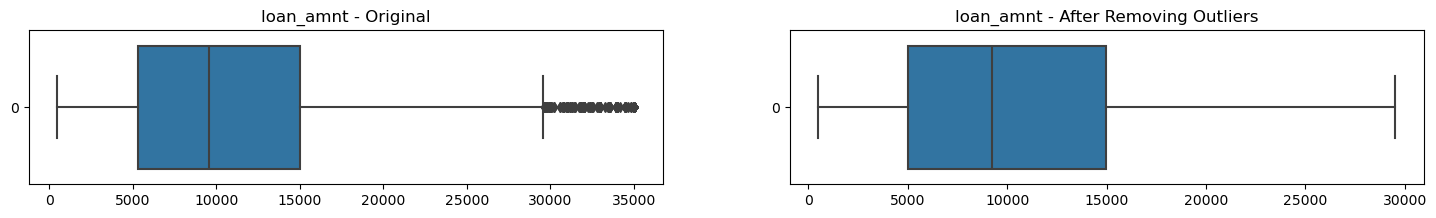

Number of rows dropped ::  1089


In [2556]:
plot_data_comparing_outliers(data, 'loan_amnt')
data = drop_outliers(data, 'loan_amnt')

Number of rows dropped ::  161


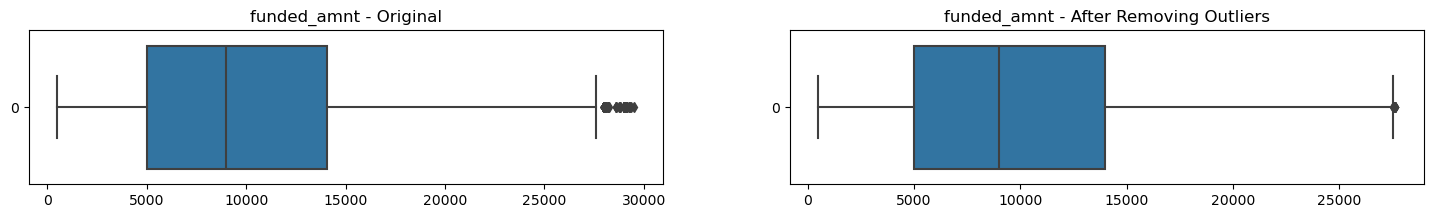

Number of rows dropped ::  161


In [2557]:
plot_data_comparing_outliers(data, 'funded_amnt')
data = drop_outliers(data, 'funded_amnt')

Number of rows dropped ::  102


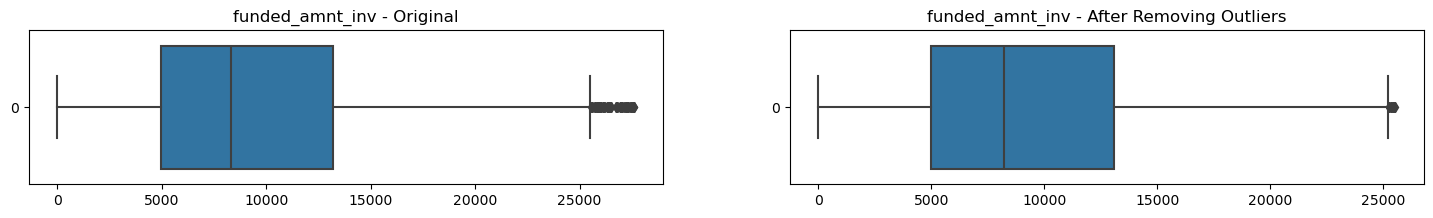

Number of rows dropped ::  102


In [2559]:
plot_data_comparing_outliers(data, 'funded_amnt_inv')
data = drop_outliers(data, 'funded_amnt_inv')

Number of rows dropped ::  62


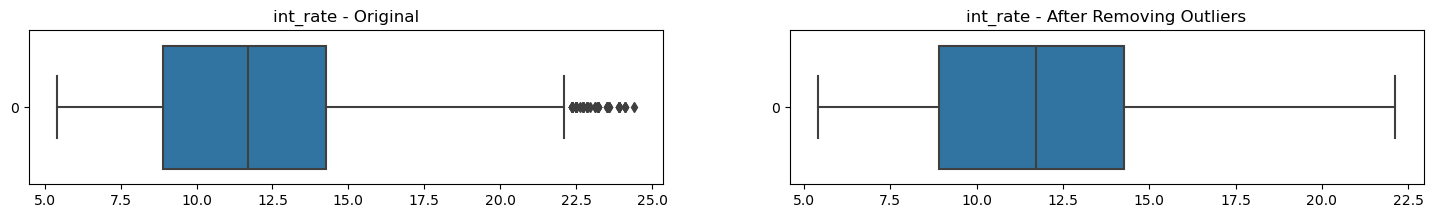

Number of rows dropped ::  62


In [2560]:
plot_data_comparing_outliers(data, 'int_rate')
data = drop_outliers(data, 'int_rate')

Number of rows dropped ::  1028


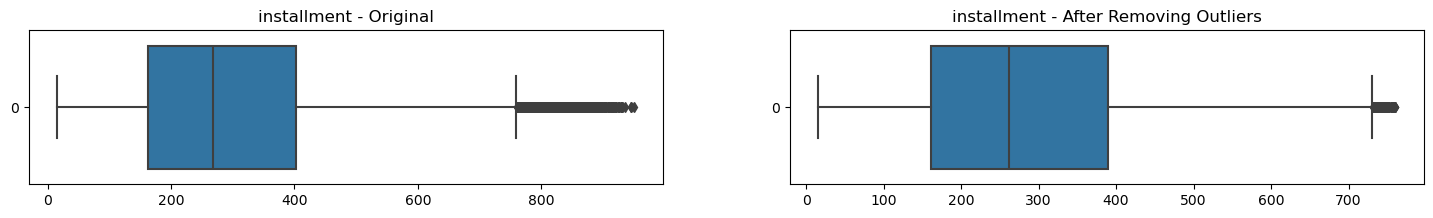

Number of rows dropped ::  1028


In [2563]:
plot_data_comparing_outliers(data, 'installment')
data = drop_outliers(data, 'installment')

Number of rows dropped ::  1570


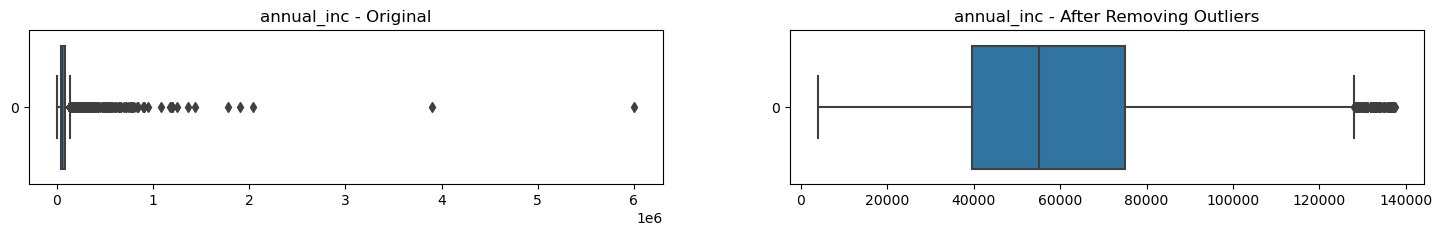

Number of rows dropped ::  1570


In [2564]:
plot_data_comparing_outliers(data, 'annual_inc')
data = drop_outliers(data, 'annual_inc')

#### Dropping columsn using Corrleation analysis

There are few columns which are highly correalted and some of them can be dropped
1. funded_amnt is highly correlated with loan_amnt . Hence dropped.
2. funded_amnt_inv is higly correlated with loan_amnt. Hence dropped.

In [2570]:
cols = ['loan_amnt','funded_amnt','funded_amnt_inv','annual_inc','dti','emp_length','pub_rec_bankruptcies']
data_corr = data[cols].corr()

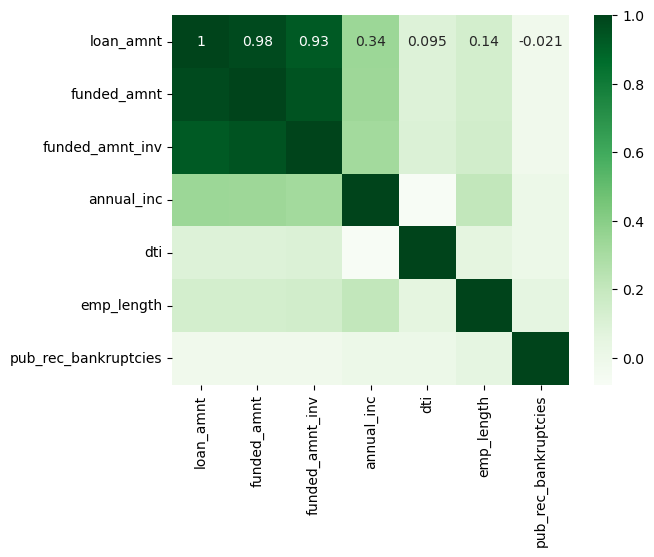

In [2572]:
sns.heatmap(data_corr,annot=True, cmap="Greens")
plt.show()

In [2574]:
data = data.drop(['funded_amnt','funded_amnt_inv'], axis=1)

## Univariate Analysis

### Unordered Categorical Variables - Univariate Analysis

There are few columns which fall in the bucket of unordered categories. This section does univariate analysis on such columns. Following the columns in consideration 
1. loan_status
2. purpose
3. home_ownership
4. addr_state

Some interesting observations are made and can be seen in next sections

In [2579]:
def plot_pie_and_bar_chart(inp, col):
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    p = data[col].value_counts().plot.pie()
    p.set_title(col + " - Pie Chart")
    plt.subplot(1,2,2)
    p = data[col].value_counts().plot.bar()
    p.set_title(col + " - Bar Chart")
    p.set_xlabel(col)
    p.set_ylabel("count")
    plt.show()

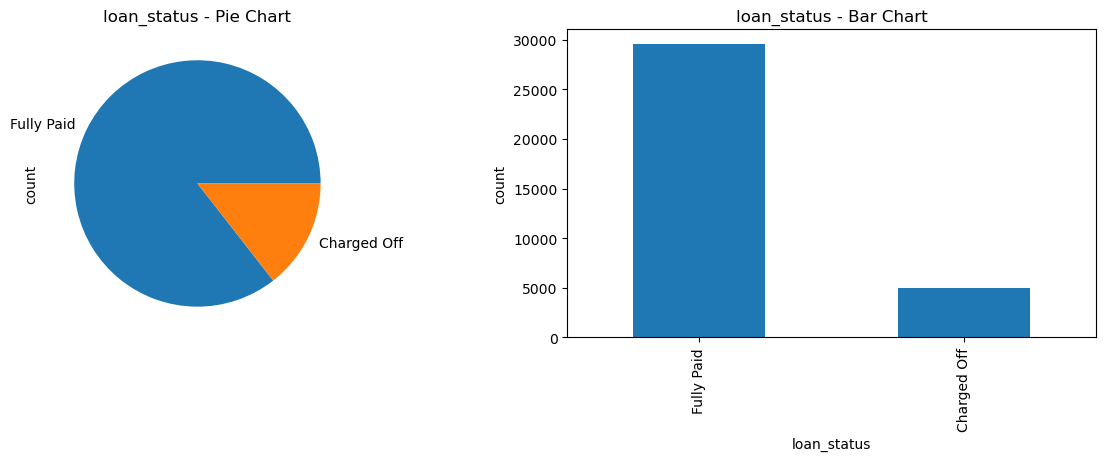

In [2581]:
# Analysing Loan Status column
plot_pie_and_bar_chart(data, 'loan_status')

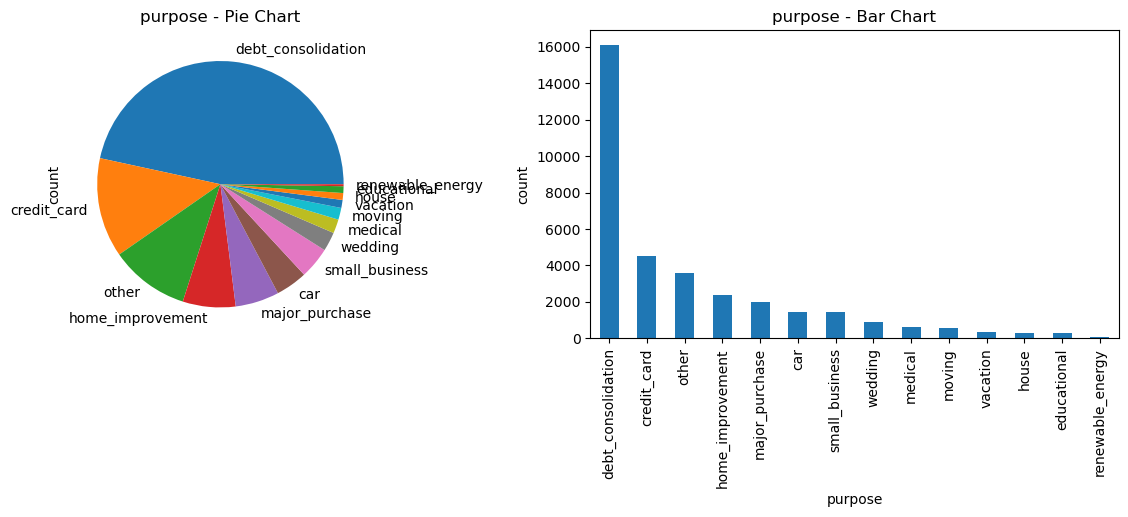

In [2582]:
plot_pie_and_bar_chart(data, 'purpose')

**Observation:** Most of loans are for the purpose of deb_consolidation followed by credit_card

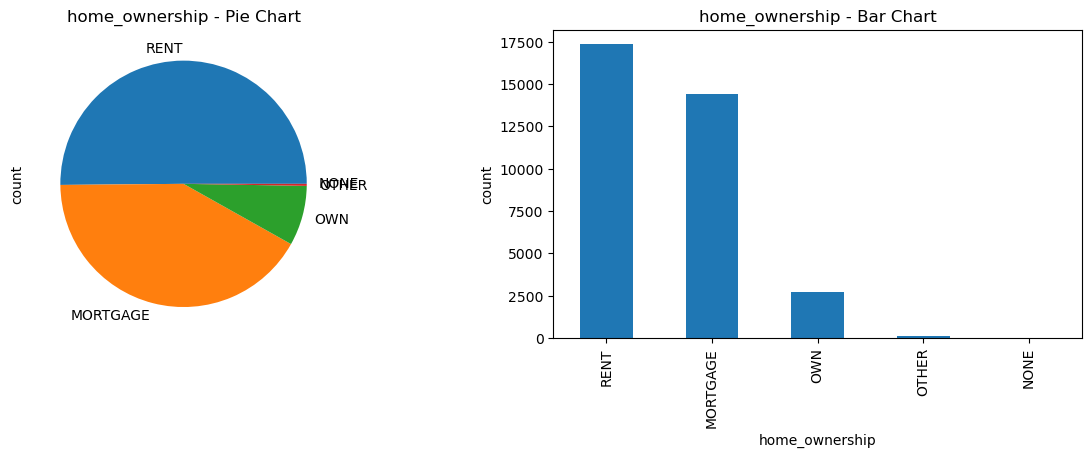

In [2585]:
plot_pie_and_bar_chart(data, 'home_ownership')

**Observation:** Most of the loan beneficieries have home rented or mortagaged

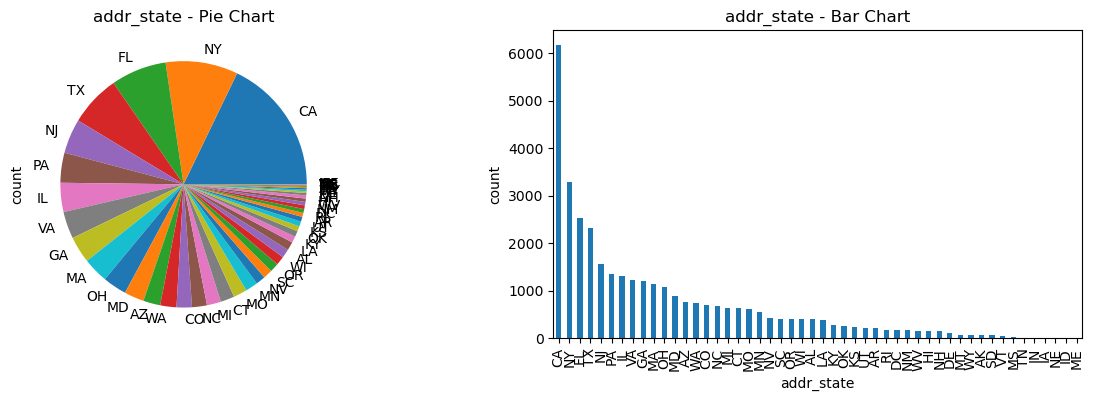

In [2588]:
plot_pie_and_bar_chart(data, 'addr_state')

**Observation:** Most of loan applications are in CA followed by NY

### Ordered Categorical Variables - Univariate Analysis

There are few columns which fall in the bucket of ordered categories. This section does univariate analysis on such columns. Following the columns in consideration
1. term
2. grade
3. emp_length
4. pub_rec_bankruptcies
5. month
6. year
month and year are derived columns derived using issue_d column

Some interesting observations are made and can be seen in next sections

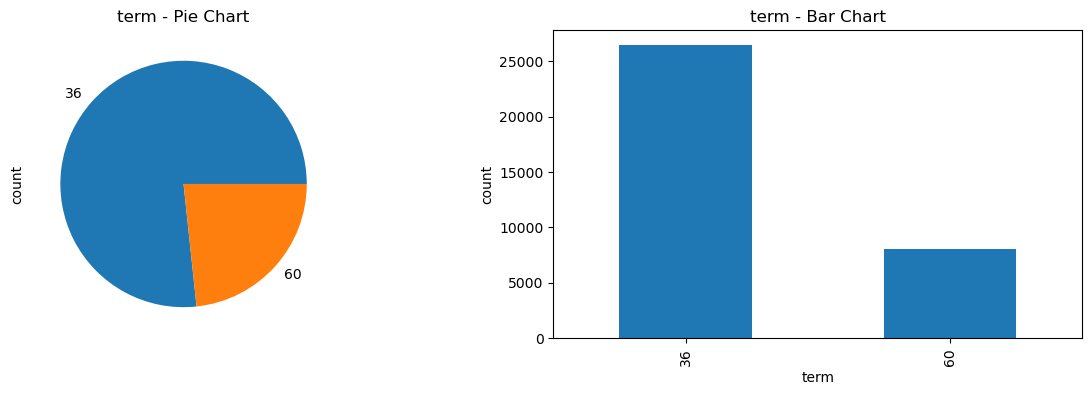

In [2593]:
plot_pie_and_bar_chart(data, 'term')

**Observation:** Most of the loan applications are with term as 36 months

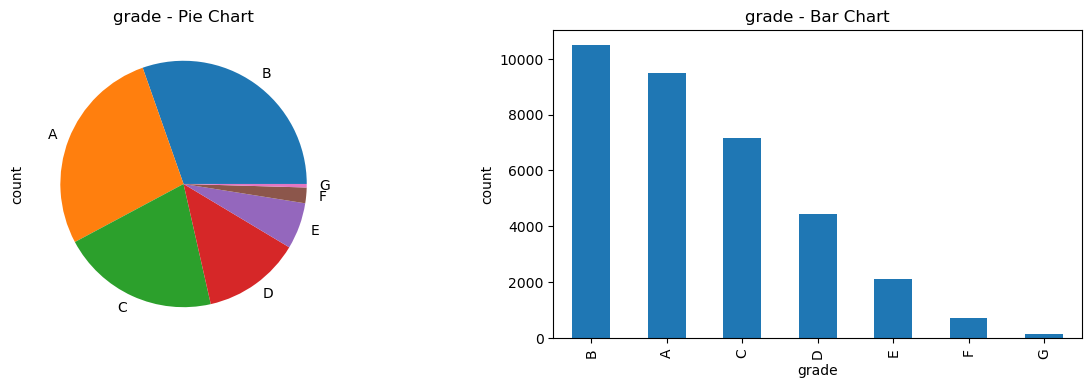

In [2596]:
plot_pie_and_bar_chart(data, 'grade')

**Observation:** Most of the loan applications fall in B and A grades

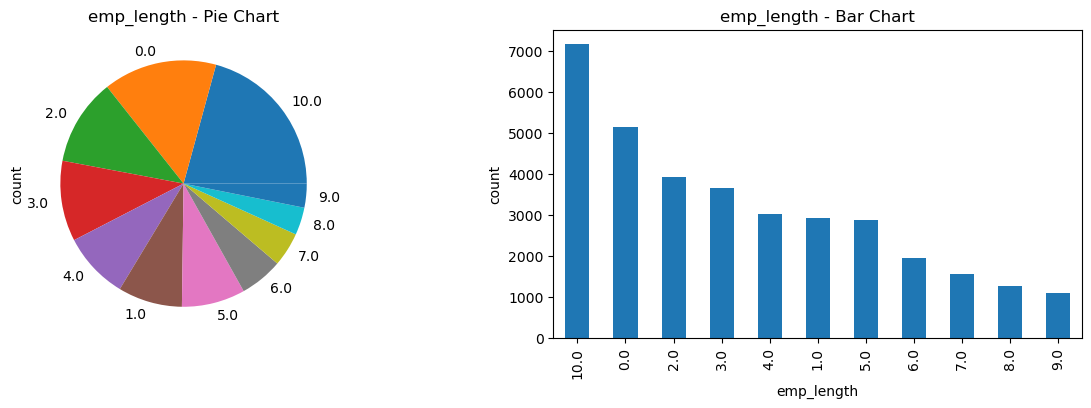

In [2599]:
plot_pie_and_bar_chart(data, 'emp_length')

**Observation:** Most of the loan applicants have emp_length of 10+ years, followed by 0 and 2 years

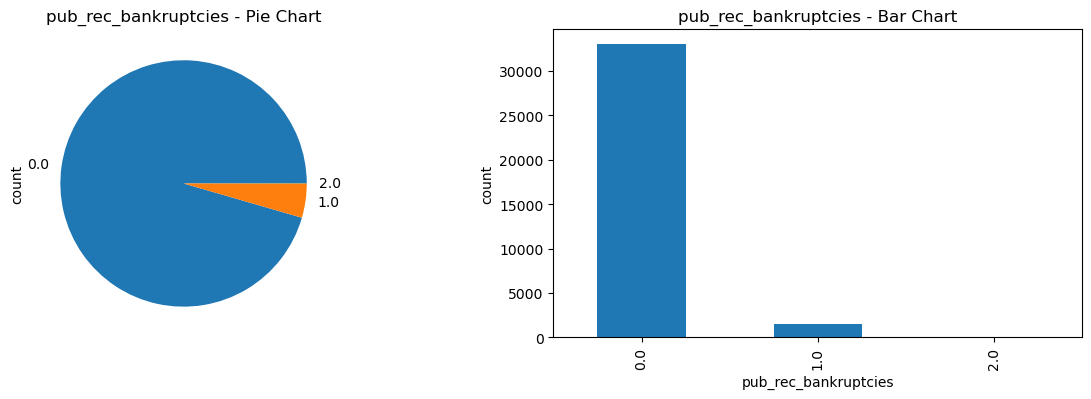

In [2602]:
plot_pie_and_bar_chart(data, 'pub_rec_bankruptcies')

**Observation:** Most of the loan applicants dont have any public record of bankruptcies

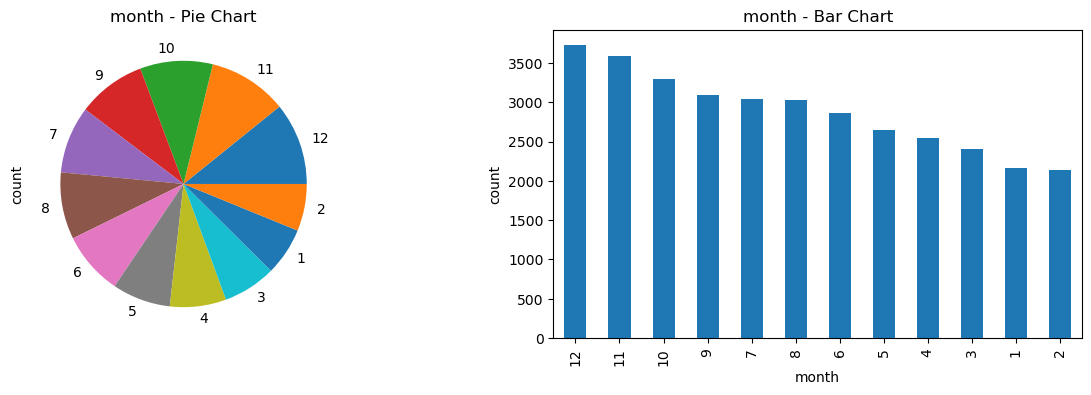

In [2606]:
plot_pie_and_bar_chart(data, 'month')

**Observation:** Most of the loan applications are towards the end of the year in the months of Oct/Nov/Dec. Then lowest number of loan applications are in first quarter of ther year Jan/Feb/March

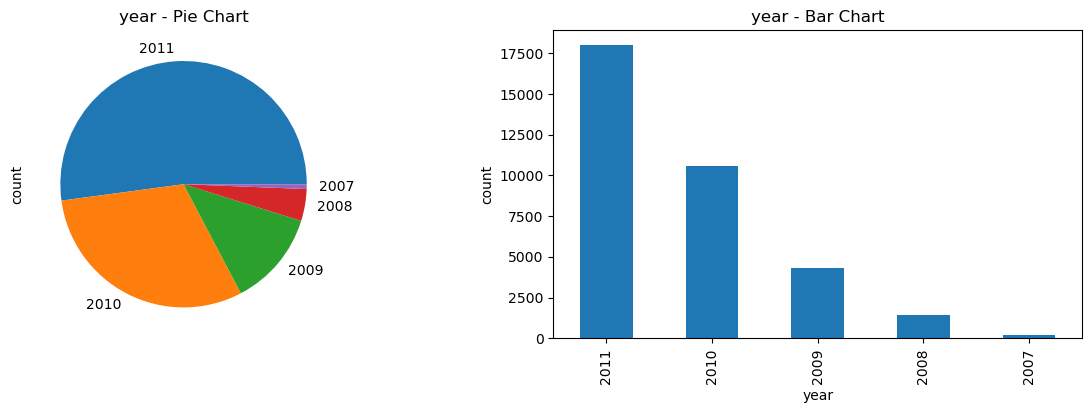

In [2609]:
plot_pie_and_bar_chart(data, 'year')

**Observation:** Loan applications increasing are over the years.

### Quantitative Variables - Univariate Analysis

In [2613]:
def plot_dist_and_box_chart(inp, col):
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    p = sns.distplot(data[col],kde = True)
    p.set_title(col + " - Distribution Plot")
    plt.subplot(1,2,2)
    p = sns.boxplot(data[col])
    p.set_title(col + " - Box Plot")
    plt.show()

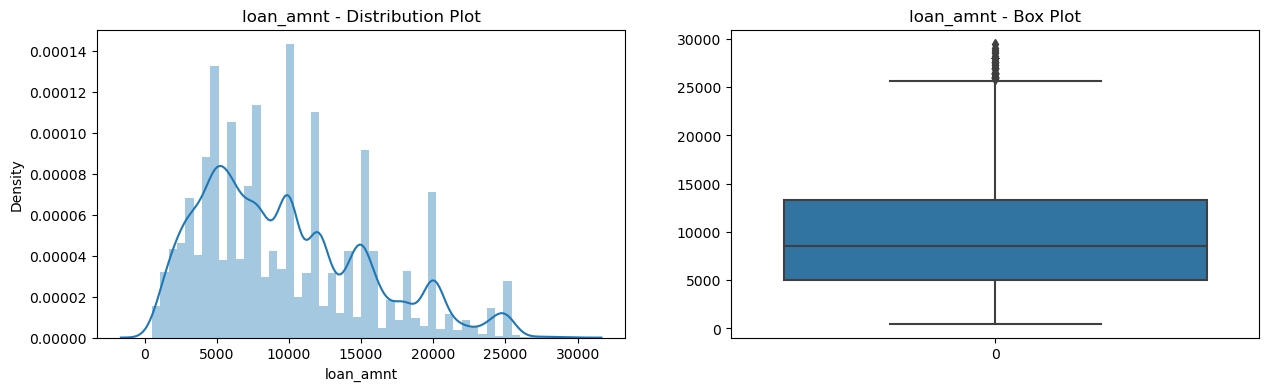

In [2615]:
# Analysing loan_amnt and it can be observed that most of the loans are in range of 5000 to  13500 approximately
plot_dist_and_box_chart(data, 'loan_amnt')

**Observation:** Most of the loan applications are in range of 5000 to 13500

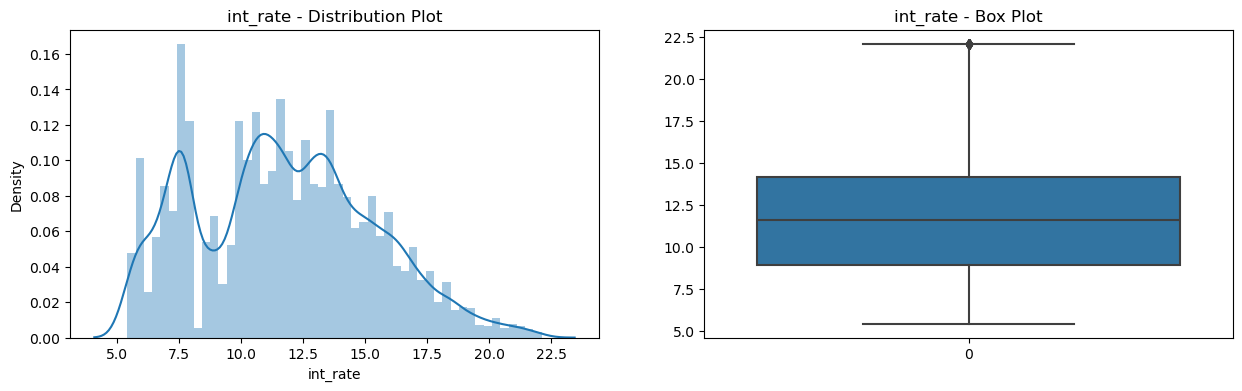

In [2617]:
plot_dist_and_box_chart(data, 'int_rate')

**Observation:** Most of the loan applicants have interest rate in range of 7% to 15%

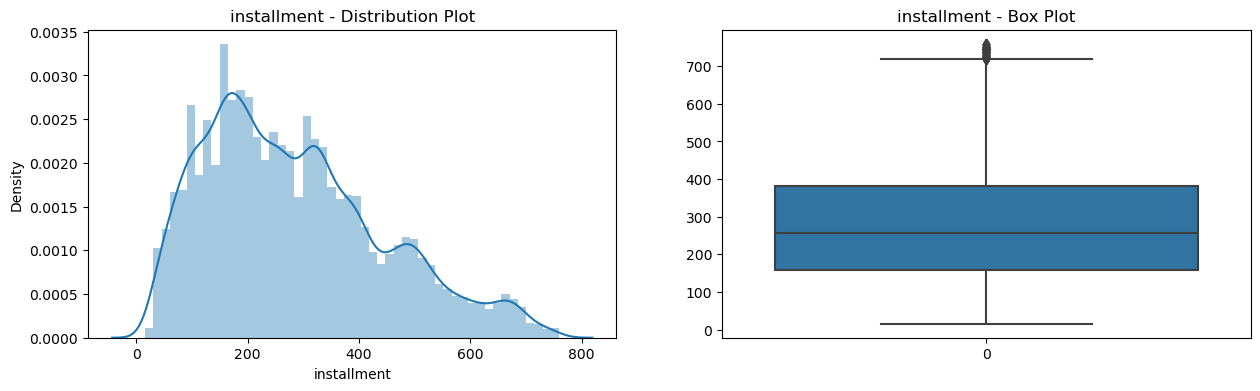

In [2620]:
plot_dist_and_box_chart(data, 'installment')

**Observation:** Most of the installments are in range of 100 to 400

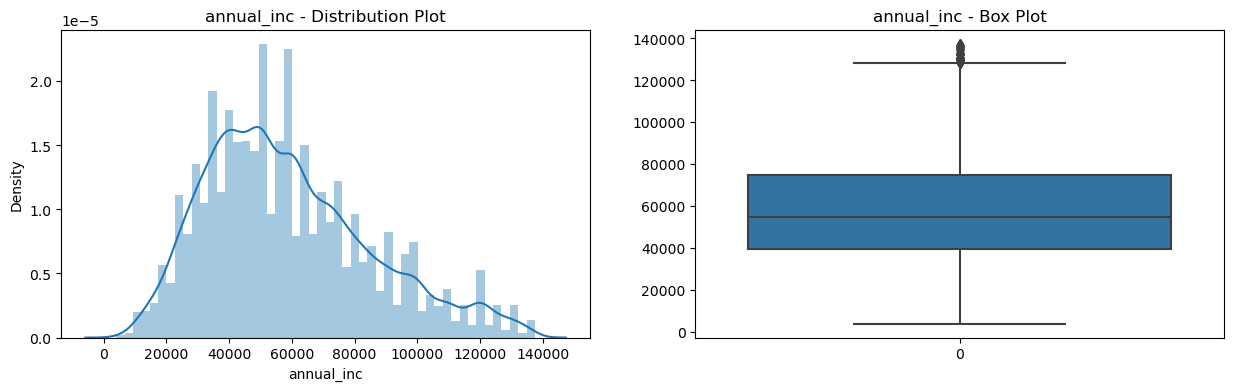

In [2623]:
plot_dist_and_box_chart(data, 'annual_inc')

**Observation:** Most of the loan applicants have annual income in range of 40000 to 80000

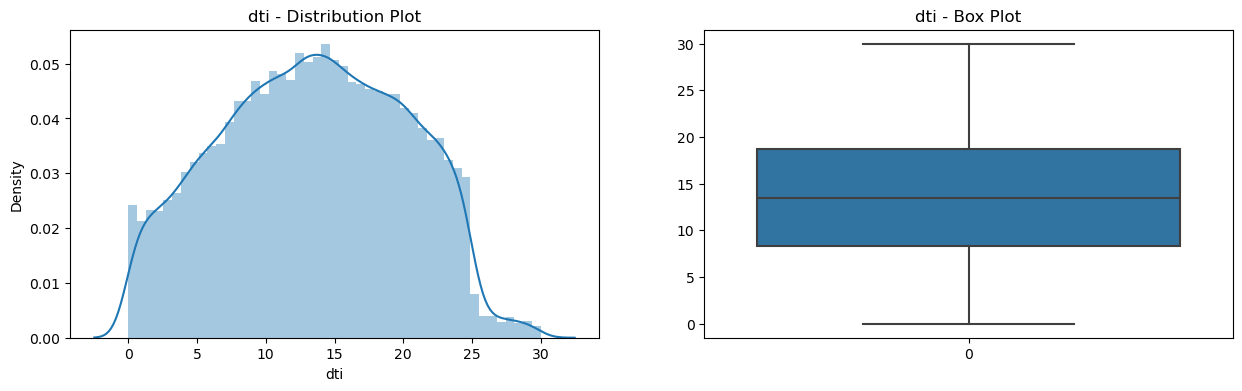

In [2625]:
plot_dist_and_box_chart(data, 'dti')

**Observation:** Most of the loan applicants have debt to income ratio in range of 6 to 20

## Bivariate Analysis

In [2435]:
term_vs_loan_status = data.pivot_table(index='term', columns='loan_status', values='id', aggfunc=len)
term_vs_loan_status.head()

loan_status,Charged Off,Fully Paid
term,,
36,2954,23552
60,2042,6017


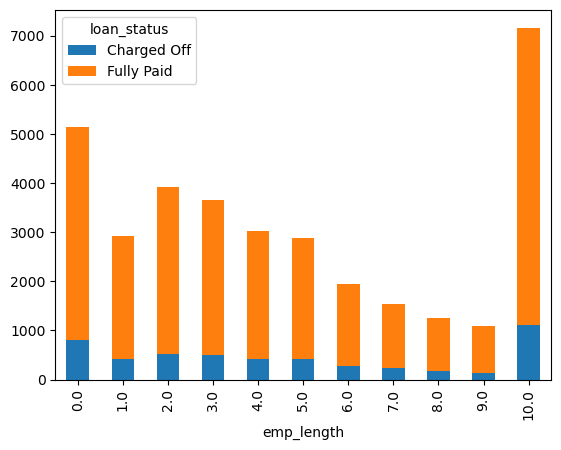

In [2635]:
term_vs_loan_status.plot(kind='bar',stacked='True')
plt.show()

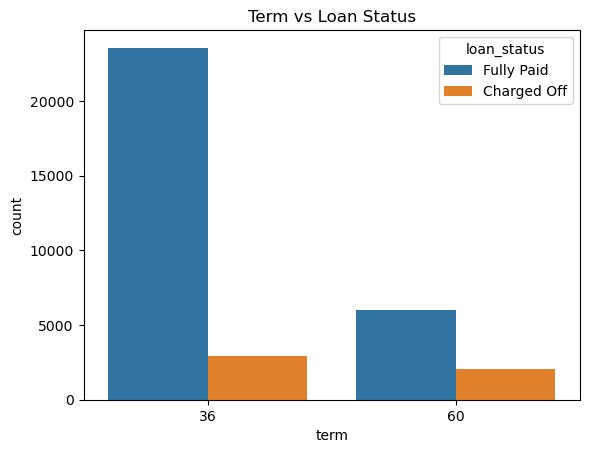

In [2641]:
p=sns.countplot(data=data, x='term', hue='loan_status' , order=data['term'].value_counts().index)
p.set_title('Term vs Loan Status')
plt.show()

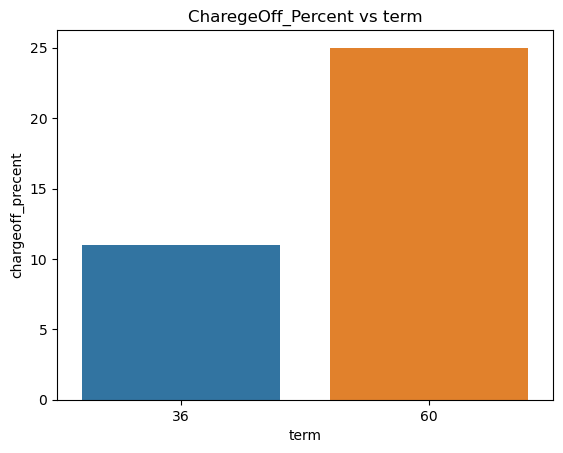

In [2643]:
tls_bar = data.pivot_table(index='term', columns='loan_status', values='id', aggfunc=len).reset_index()
tls_bar['total'] = tls_bar['Charged Off'] + tls_bar['Fully Paid']
tls_bar['chargeoff_precent'] = round(tls_bar['Charged Off'] / tls_bar['total'] * 100)
tls_bar.sort_values(by='total', ascending=False)
p = sns.barplot(x=tls_bar['term'],y=tls_bar['chargeoff_precent'])
p.set_title('CharegeOff_Percent vs term')
plt.show()

In [2481]:
grade_vs_loan_status = data.pivot_table(index='grade', columns='loan_status', values='id', aggfunc=len)
grade_vs_loan_status.head()

loan_status,Charged Off,Fully Paid
grade,,
A,585,8895
B,1309,9193
C,1263,5905
D,993,3452
E,567,1535


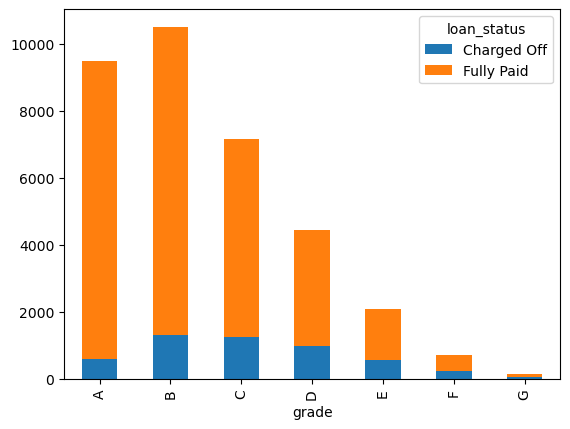

In [2483]:
grade_vs_loan_status.plot(kind='bar',stacked='True')
plt.show()

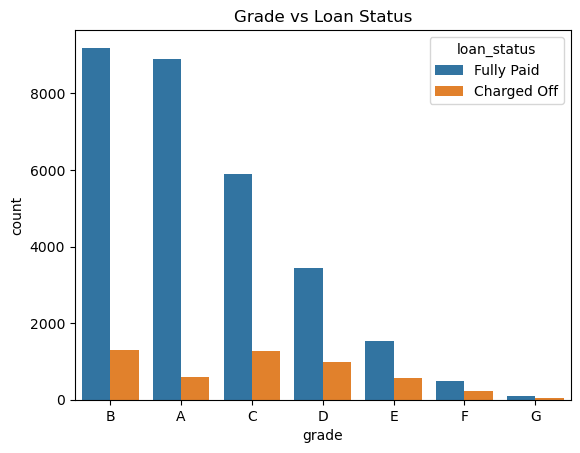

In [2645]:
p=sns.countplot(data=data, x='grade', hue='loan_status' , order=data['grade'].value_counts().index)
p.set_title('Grade vs Loan Status')
plt.show()

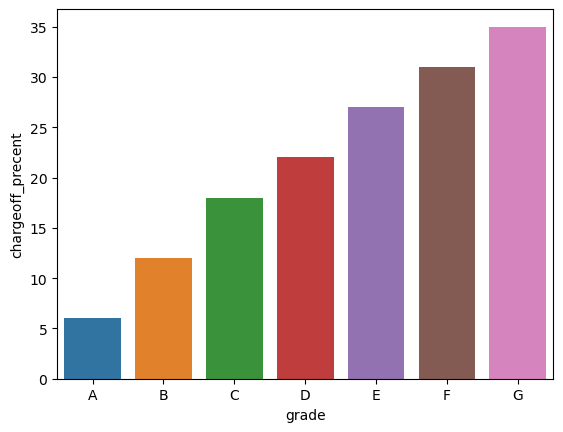

In [2477]:
grade_bar = data.pivot_table(index='grade', columns='loan_status', values='id', aggfunc=len).reset_index()
grade_bar['total'] = grade_bar['Charged Off'] + grade_bar['Fully Paid']
grade_bar['chargeoff_precent'] = round(grade_bar['Charged Off'] / grade_bar['total'] * 100)
grade_bar.sort_values(by='total', ascending=False)
p = sns.barplot(x=grade_bar['grade'],y=grade_bar['chargeoff_precent'])
plt.show()

In [2485]:
empl_vs_loan_status = data.pivot_table(index='emp_length', columns='loan_status', values='id', aggfunc=len)
empl_vs_loan_status.head()

loan_status,Charged Off,Fully Paid
emp_length,,
0.0,803,4350
1.0,418,2498
2.0,515,3417
3.0,496,3154
4.0,411,2617


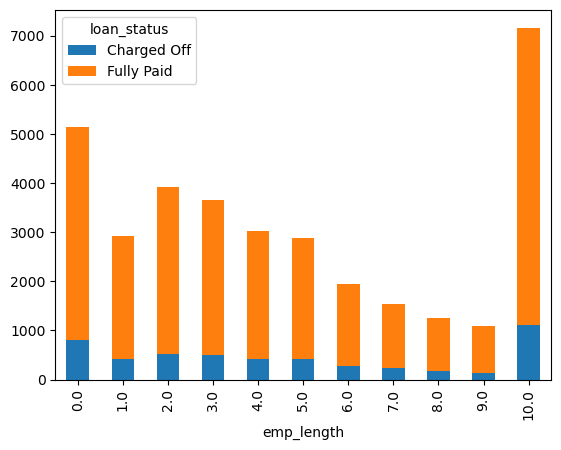

In [2487]:
empl_vs_loan_status.plot(kind='bar',stacked='True')
plt.show()

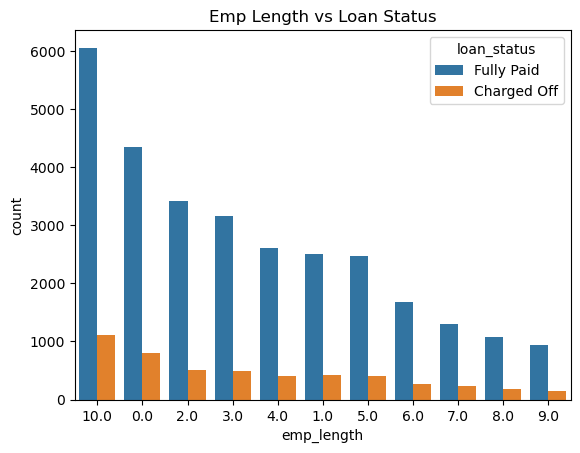

In [2647]:
p=sns.countplot(data=data, x='emp_length', hue='loan_status' , order=data['emp_length'].value_counts().index)
p.set_title('Emp Length vs Loan Status')
plt.show()

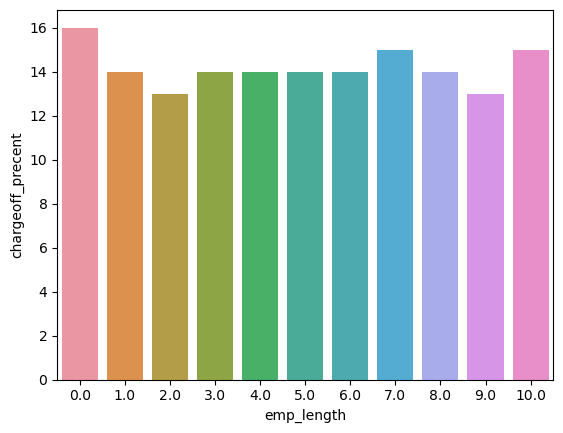

In [2649]:
empl_bar = data.pivot_table(index='emp_length', columns='loan_status', values='id', aggfunc=len).reset_index()
empl_bar['total'] = empl_bar['Charged Off'] + empl_bar['Fully Paid']
empl_bar['chargeoff_precent'] = round(empl_bar['Charged Off'] / empl_bar['total'] * 100)
empl_bar.sort_values(by='total', ascending=False)
p = sns.barplot(x=empl_bar['emp_length'],y=empl_bar['chargeoff_precent'])
plt.show()

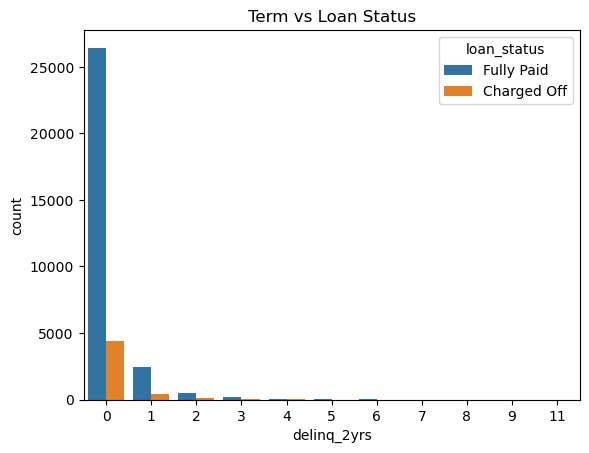

In [1549]:
p = sns.countplot(data=data, x='delinq_2yrs', hue='loan_status' , order=data['delinq_2yrs'].value_counts().index)
p.set_title('Term vs Loan Status')
plt.show()

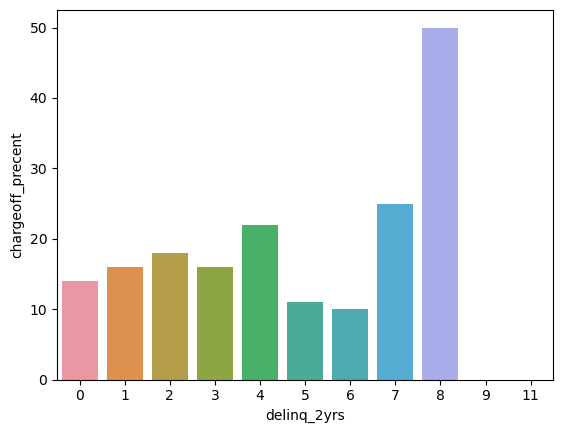

In [2651]:
dl2y_bar = data.pivot_table(index='delinq_2yrs', columns='loan_status', values='id', aggfunc=len).reset_index()
dl2y_bar['total'] = dl2y_bar['Charged Off'] + dl2y_bar['Fully Paid']
dl2y_bar['chargeoff_precent'] = round(dl2y_bar['Charged Off'] / dl2y_bar['total'] * 100)
dl2y_bar.sort_values(by='total', ascending=False)
p = sns.barplot(x=dl2y_bar['delinq_2yrs'],y=dl2y_bar['chargeoff_precent'])
plt.show()

In [2655]:
home_vs_loan_status = data.pivot_table(index='home_ownership', columns='loan_status', values='id', aggfunc=len)
home_vs_loan_status.head()

loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,1944.0,12478.0
NONE,NaN,3.0
OTHER,16.0,73.0
OWN,404.0,2315.0
RENT,2632.0,14700.0


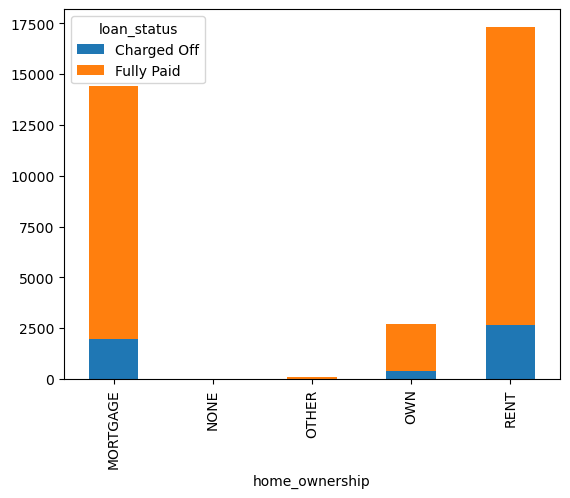

In [2657]:
home_vs_loan_status.plot(kind='bar',stacked='True')
plt.show()

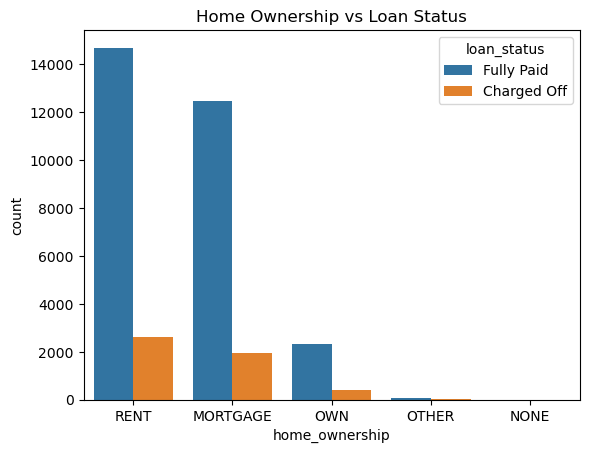

In [2653]:
p = sns.countplot(data=data, x='home_ownership', hue='loan_status' , order=data['home_ownership'].value_counts().index)
p.set_title('Home Ownership vs Loan Status')
plt.show()

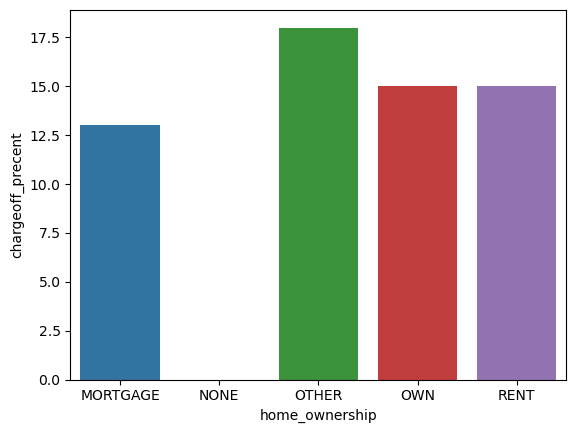

In [2659]:
home_bar = data.pivot_table(index='home_ownership', columns='loan_status', values='id', aggfunc=len).reset_index()
home_bar['total'] = home_bar['Charged Off'] + home_bar['Fully Paid']
home_bar['chargeoff_precent'] = round(home_bar['Charged Off'] / home_bar['total'] * 100)
home_bar.sort_values(by='total', ascending=False)
p = sns.barplot(x=home_bar['home_ownership'],y=home_bar['chargeoff_precent'])
plt.show()

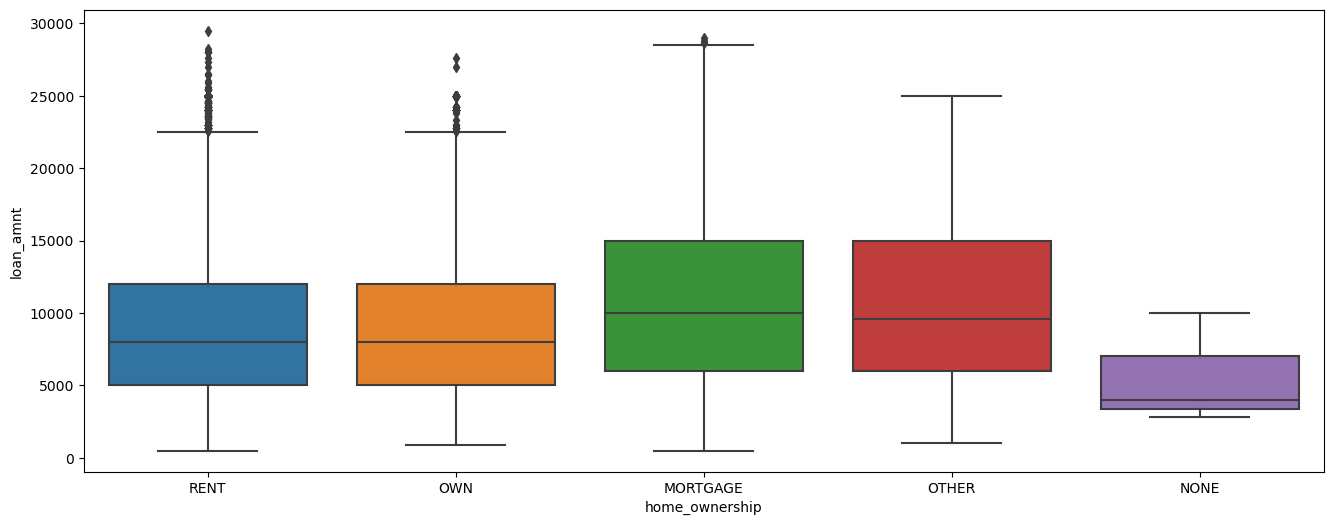

In [1543]:
plot.figure(figsize=(16,6))
sns.boxplot(y=data.loan_amnt,x=data.home_ownership)
plot.show()

In [2661]:
purpose_vs_loan_status = data.pivot_table(index='purpose', columns='loan_status', values='id', aggfunc=len)
purpose_vs_loan_status.head()

loan_status,Charged Off,Fully Paid
purpose,,
car,157,1276
credit_card,481,4033
debt_consolidation,2442,13667
educational,52,254
home_improvement,295,2099


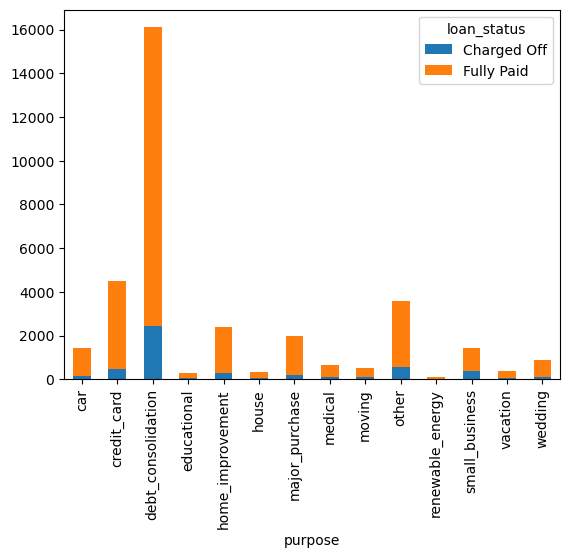

In [2663]:
purpose_vs_loan_status.plot(kind='bar',stacked='True')
plt.show()

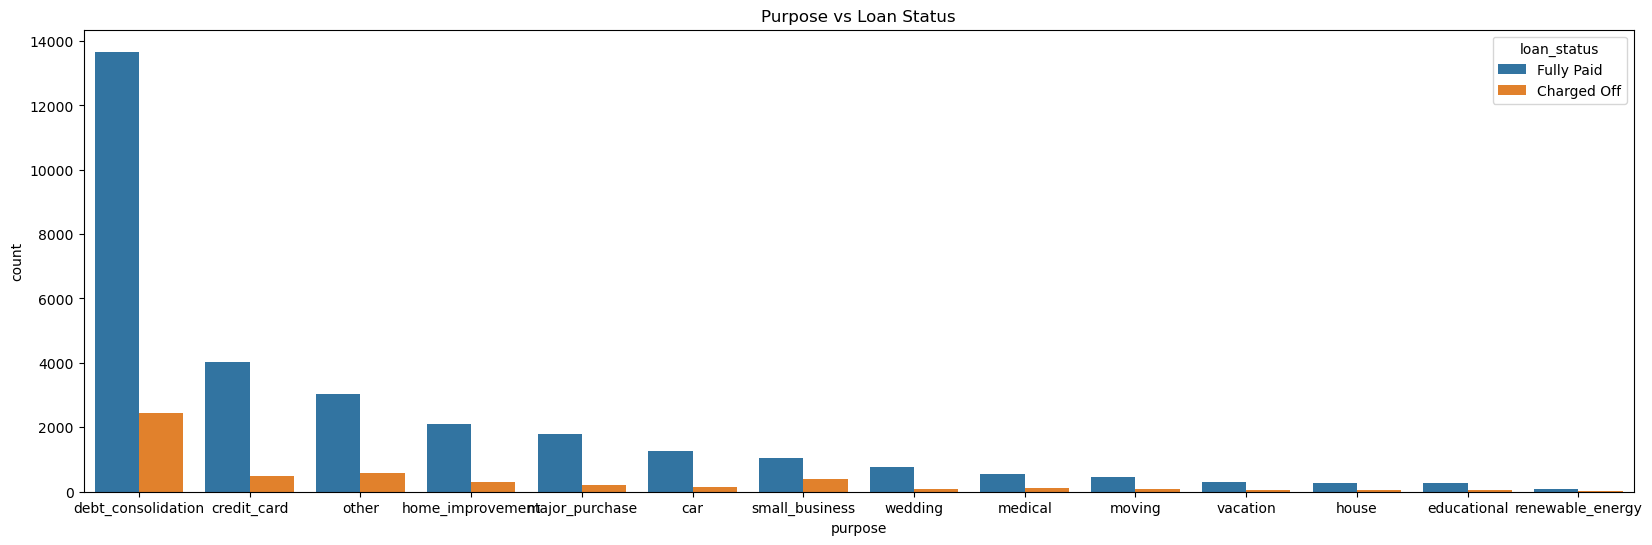

In [2665]:
plot.figure(figsize=(20,6))
p = sns.countplot(data=data, x='purpose', hue='loan_status' , order=data['purpose'].value_counts().index)
p.set_title('Purpose vs Loan Status')
plt.show()

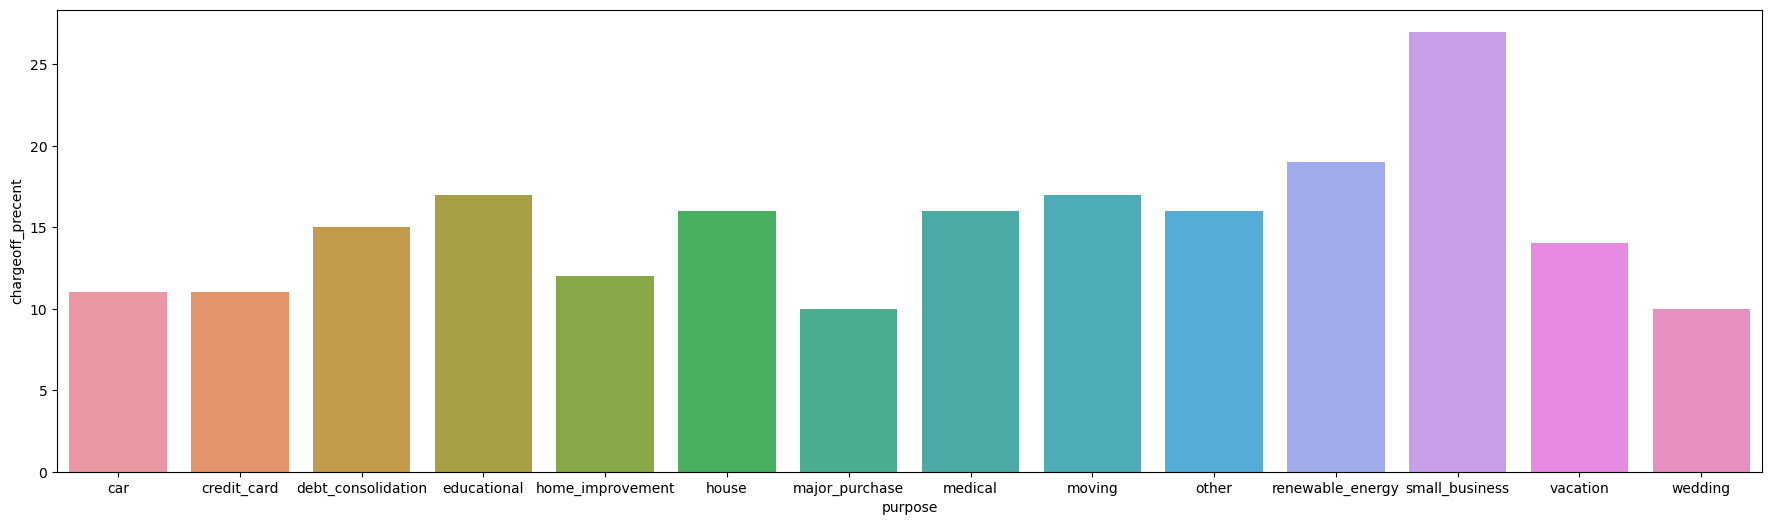

In [2673]:
purpose_bar = data.pivot_table(index='purpose', columns='loan_status', values='id', aggfunc=len).reset_index()
purpose_bar['total'] = purpose_bar['Charged Off'] + purpose_bar['Fully Paid']
purpose_bar['chargeoff_precent'] = round(purpose_bar['Charged Off'] / purpose_bar['total'] * 100)
purpose_bar.sort_values(by='total', ascending=False)
plt.figure(figsize=(22,6))
p = sns.barplot(x=purpose_bar['purpose'],y=purpose_bar['chargeoff_precent'])
plt.show()

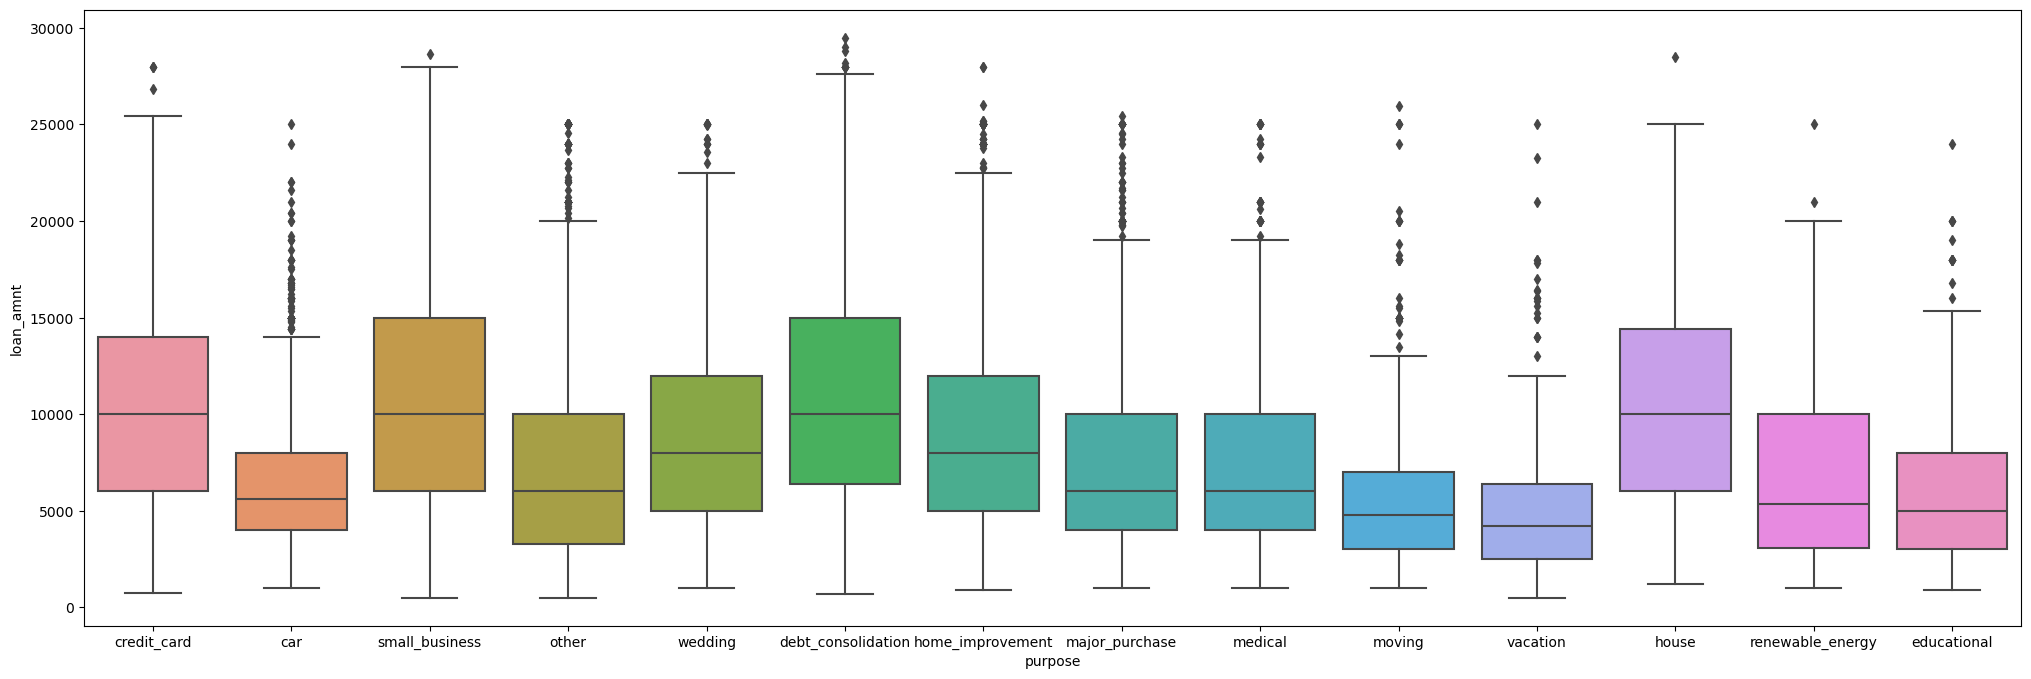

In [1390]:
plot.figure(figsize=(25,8))
sns.boxplot(y=data.loan_amnt,x=data.purpose)
plot.show()

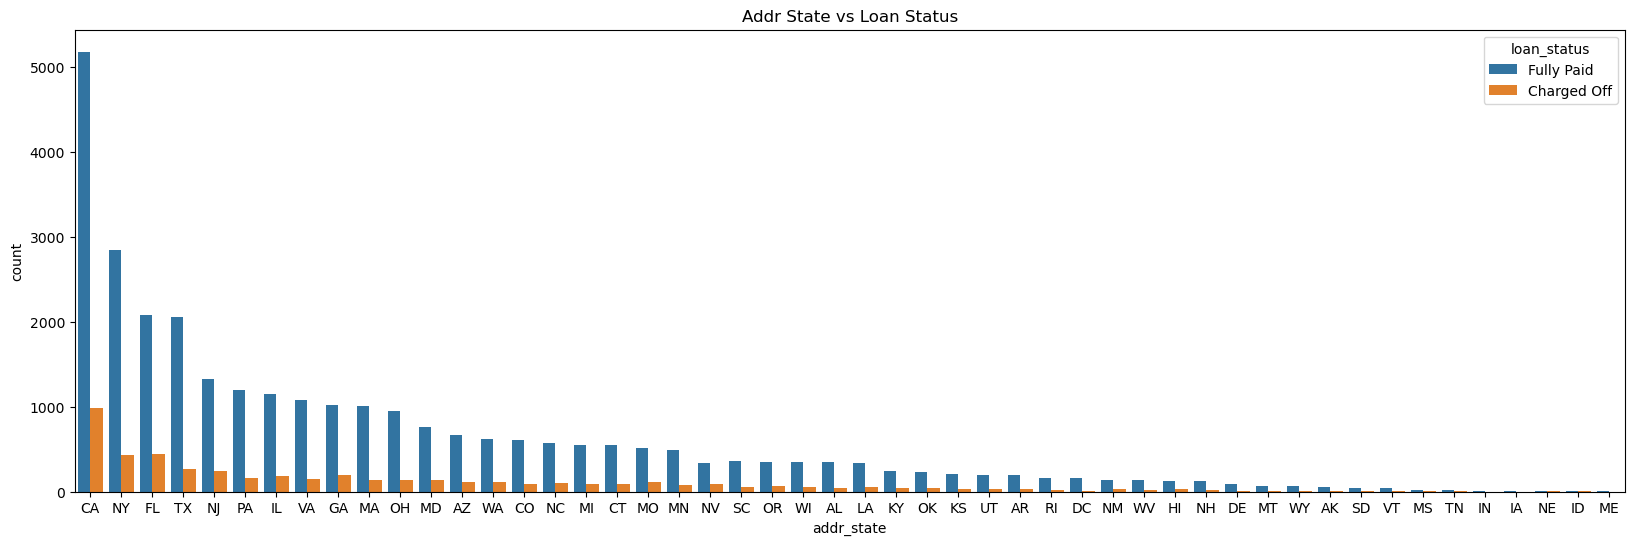

In [2667]:
plot.figure(figsize=(20,6))
p = sns.countplot(data=data, x='addr_state', hue='loan_status' , order=data['addr_state'].value_counts().index)
p.set_title('Addr State vs Loan Status')
plt.show()

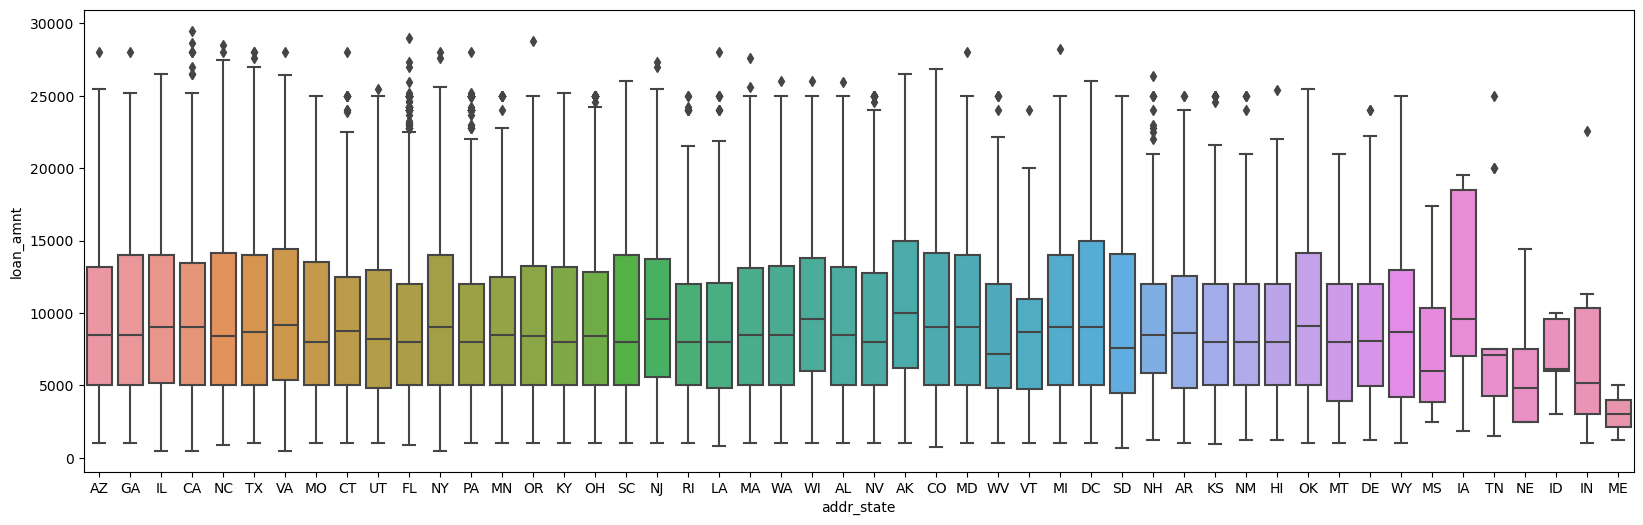

In [1396]:
plot.figure(figsize=(20,6))
sns.boxplot(y=data.loan_amnt,x=data.addr_state)
plot.show()

In [2675]:
pcb_vs_loan_status = data.pivot_table(index='pub_rec_bankruptcies', columns='loan_status', values='id', aggfunc=len)
pcb_vs_loan_status.head()

loan_status,Charged Off,Fully Paid
pub_rec_bankruptcies,,
0.0,4655,28358
1.0,339,1208
2.0,2,3


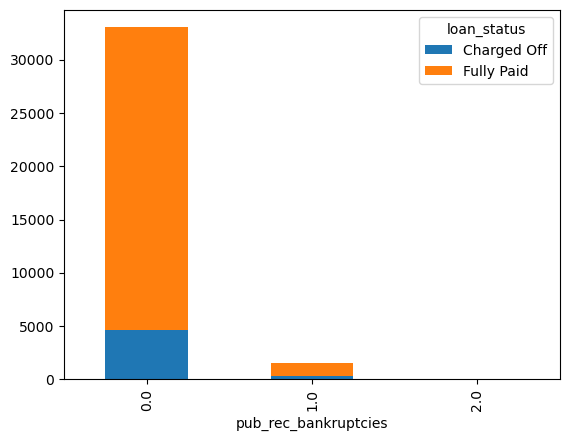

In [2677]:
pcb_vs_loan_status.plot(kind='bar',stacked='True')
plt.show()

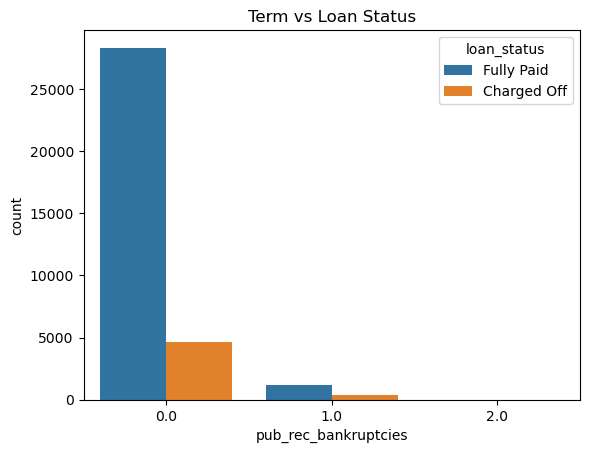

In [1400]:
p = sns.countplot(data=data, x='pub_rec_bankruptcies', hue='loan_status' , order=data['pub_rec_bankruptcies'].value_counts().index)
p.set_title('Term vs Loan Status')
plt.show()

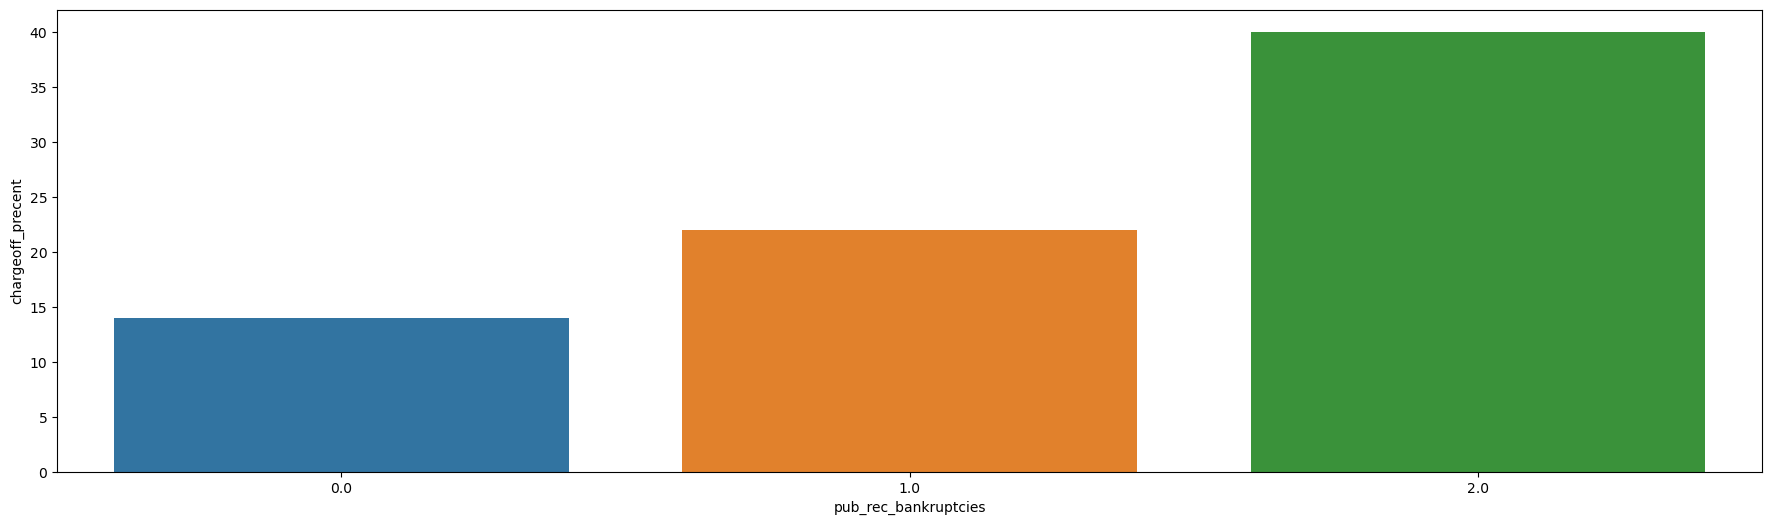

In [2679]:
pcb_bar = data.pivot_table(index='pub_rec_bankruptcies', columns='loan_status', values='id', aggfunc=len).reset_index()
pcb_bar['total'] = pcb_bar['Charged Off'] + pcb_bar['Fully Paid']
pcb_bar['chargeoff_precent'] = round(pcb_bar['Charged Off'] / pcb_bar['total'] * 100)
pcb_bar.sort_values(by='total', ascending=False)
plt.figure(figsize=(22,6))
p = sns.barplot(x=pcb_bar['pub_rec_bankruptcies'],y=pcb_bar['chargeoff_precent'])
plt.show()

<Figure size 600x1000 with 0 Axes>

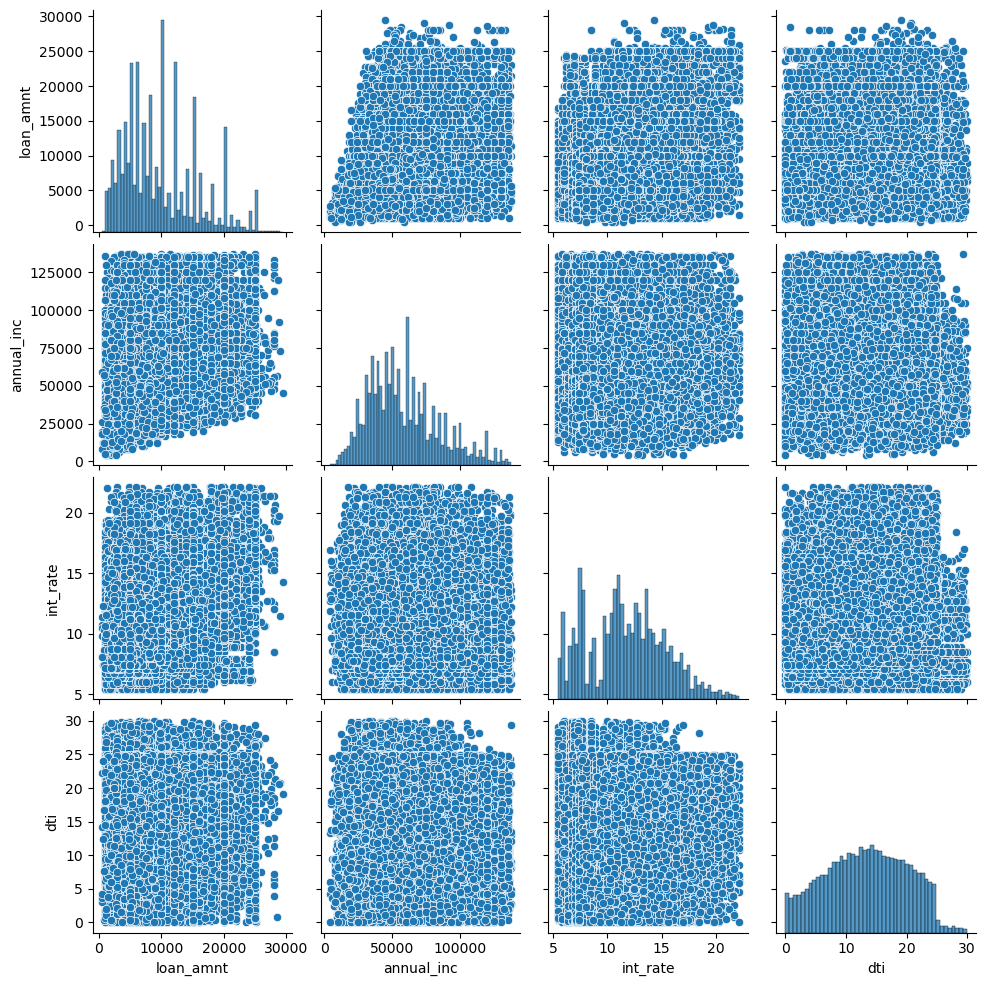

In [1422]:
plt.figure(figsize=(6,10))
sns.pairplot(data[['loan_amnt', 'annual_inc', 'int_rate', 'dti']])
plt.show()